In [33]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from generate_data import generate_Ls, generate_sylvester_data
from proximal_gradient_descent import (
    get_optimizer_oracles,
    proximal_accelerated_gradient,
    project_to_lower_with_positive_diag,
    warm_start
)
from plotting_utilities import get_metrics, patternify_Ls, one_example_prs
from sklearn.metrics import precision_score, recall_score, matthews_corrcoef, auc
import pickle

# Prevent Type 3 fonts
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Verifying Strong Convexity

In this section, we'll verify strong convexity by demonstrating that our optimization algorithm (proximal accelerated gradient descent) exhibits linear convergence.

In [2]:
np.random.seed(0)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True, source_distribution=np.random.normal)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoreg = 0.5e-6
objective, gradient, proximal = get_optimizer_oracles(X, frobreg=frobreg, glassoregs=glassoreg)

Ls, (_, eps, _, _) = proximal_accelerated_gradient(
    f=objective,
    del_f=gradient,
    prox=proximal,
    P=project_to_lower_with_positive_diag,
    Ls=L_init,
    mu=0.2,
    init_alpha=1,
    tau=0.5,
    beta=0.0001,
    max_iter=5000,
    tol=1e-20
)

/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


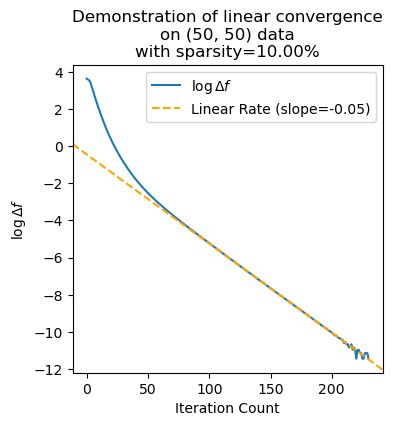

In [3]:
del_f = -np.array(eps)
iterations = np.arange(len(eps))
iterations = iterations[del_f > 0]
del_f = np.log10(del_f[del_f > 0])

linear_data = iterations > 100
slope, intercept = np.polyfit(iterations[linear_data], del_f[linear_data], deg=1)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(iterations, del_f, label=r"$\log\Delta f$")
ax.set_title(f"Demonstration of linear convergence\non {dims} data\nwith {sparsity=:.2%}")
ax.set_xlabel("Iteration Count")
ax.set_ylabel(rf"$\log\Delta f$")
ax.axline(xy1=(0, intercept), slope=slope, linestyle='--', color='orange', label=f'Linear Rate ({slope=:.2f})')
ax.legend()
pass

In [4]:
np.random.seed(0)
dims = (30, 30, 30)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True, source_distribution=np.random.normal)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoreg = 0.5e-6
objective, gradient, proximal = get_optimizer_oracles(X, frobreg=frobreg, glassoregs=glassoreg)

Ls, (_, eps, _, _) = proximal_accelerated_gradient(
    f=objective,
    del_f=gradient,
    prox=proximal,
    P=project_to_lower_with_positive_diag,
    Ls=L_init,
    mu=0.2,
    init_alpha=1,
    tau=0.5,
    beta=0.0001,
    max_iter=5000,
    tol=1e-20
)

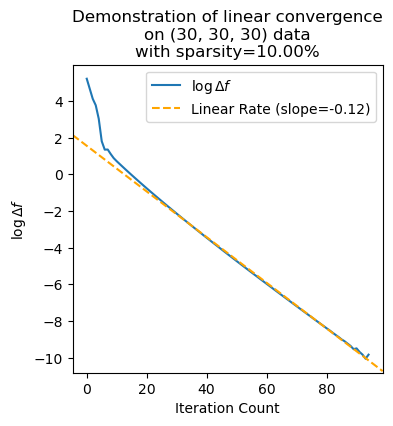

In [5]:
del_f = -np.array(eps)
iterations = np.arange(len(eps))
iterations = iterations[del_f > 0]
del_f = np.log10(del_f[del_f > 0])

linear_data = iterations > 20
slope, intercept = np.polyfit(iterations[linear_data], del_f[linear_data], deg=1)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(iterations, del_f, label=r"$\log\Delta f$")
ax.set_title(f"Demonstration of linear convergence\non {dims} data\nwith {sparsity=:.2%}")
ax.set_xlabel("Iteration Count")
ax.set_ylabel(rf"$\log\Delta f$")
ax.axline(xy1=(0, intercept), slope=slope, linestyle='--', color='orange', label=f'Linear Rate ({slope=:.2f})')
ax.legend()
pass

In [6]:
np.random.seed(0)
dims = (100, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True, source_distribution=np.random.normal)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoreg = 0.5e-6
objective, gradient, proximal = get_optimizer_oracles(X, frobreg=frobreg, glassoregs=glassoreg)

Ls, (_, eps, _, _) = proximal_accelerated_gradient(
    f=objective,
    del_f=gradient,
    prox=proximal,
    P=project_to_lower_with_positive_diag,
    Ls=L_init,
    mu=0.2,
    init_alpha=1,
    tau=0.5,
    beta=0.0001,
    max_iter=5000,
    tol=1e-20
)

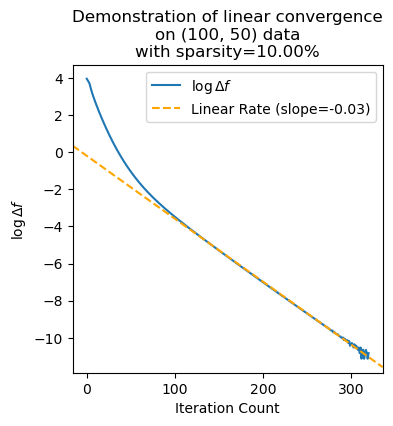

In [7]:
del_f = -np.array(eps)
iterations = np.arange(len(eps))
iterations = iterations[del_f > 0]
del_f = np.log10(del_f[del_f > 0])

linear_data = iterations > 100
slope, intercept = np.polyfit(iterations[linear_data], del_f[linear_data], deg=1)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(iterations, del_f, label=r"$\log\Delta f$")
ax.set_title(f"Demonstration of linear convergence\non {dims} data\nwith {sparsity=:.2%}")
ax.set_xlabel("Iteration Count")
ax.set_ylabel(rf"$\log\Delta f$")
ax.axline(xy1=(0, intercept), slope=slope, linestyle='--', color='orange', label=f'Linear Rate ({slope=:.2f})')
ax.legend()
pass

In [8]:
np.random.seed(0)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True, source_distribution=np.random.gumbel)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoreg = 0.5e-6
objective, gradient, proximal = get_optimizer_oracles(X, frobreg=frobreg, glassoregs=glassoreg)

Ls, (_, eps, _, _) = proximal_accelerated_gradient(
    f=objective,
    del_f=gradient,
    prox=proximal,
    P=project_to_lower_with_positive_diag,
    Ls=L_init,
    mu=0.2,
    init_alpha=1,
    tau=0.5,
    beta=0.0001,
    max_iter=5000,
    tol=1e-20
)

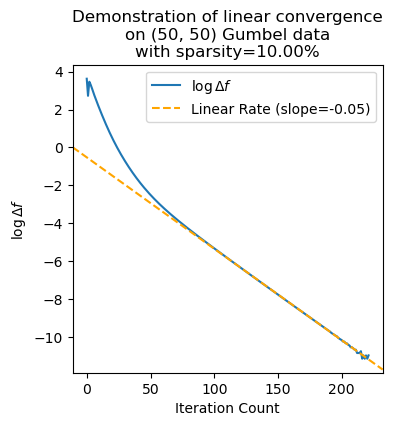

In [9]:
del_f = -np.array(eps)
iterations = np.arange(len(eps))
iterations = iterations[del_f > 0]
del_f = np.log10(del_f[del_f > 0])

linear_data = iterations > 100
slope, intercept = np.polyfit(iterations[linear_data], del_f[linear_data], deg=1)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(iterations, del_f, label=r"$\log\Delta f$")
ax.set_title(f"Demonstration of linear convergence\non {dims} Gumbel data\nwith {sparsity=:.2%}")
ax.set_xlabel("Iteration Count")
ax.set_ylabel(rf"$\log\Delta f$")
ax.axline(xy1=(0, intercept), slope=slope, linestyle='--', color='orange', label=f'Linear Rate ({slope=:.2f})')
ax.legend()
pass

# Single-Example PR Curves

In this section, we'll generate figures showing a PR curves on a single example (the seed-0 example) to get a feel for the kinds of performance we can expect.

In [35]:
np.random.seed(0)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.2, -2, 500) # (50, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True)
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0}, dont_warm_start=True)

/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:80: RuntimeWarning: invalid value encountered in divide
  shared_precs = shared_TPs / (shared_TPs + shared_FPs)
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:84: RuntimeWarning: invalid value encountered in divide
  f1s = [2*precs[i]*recs[i]/(precs[i]+recs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:94: RuntimeWarning: invalid value encountered in divide
  shared_f1s =  2 * (shared_precs * shared_recs)/(shared_precs + shared_recs)
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:97: RuntimeWarning: invalid value encountered in divide
  (shared_TPs *

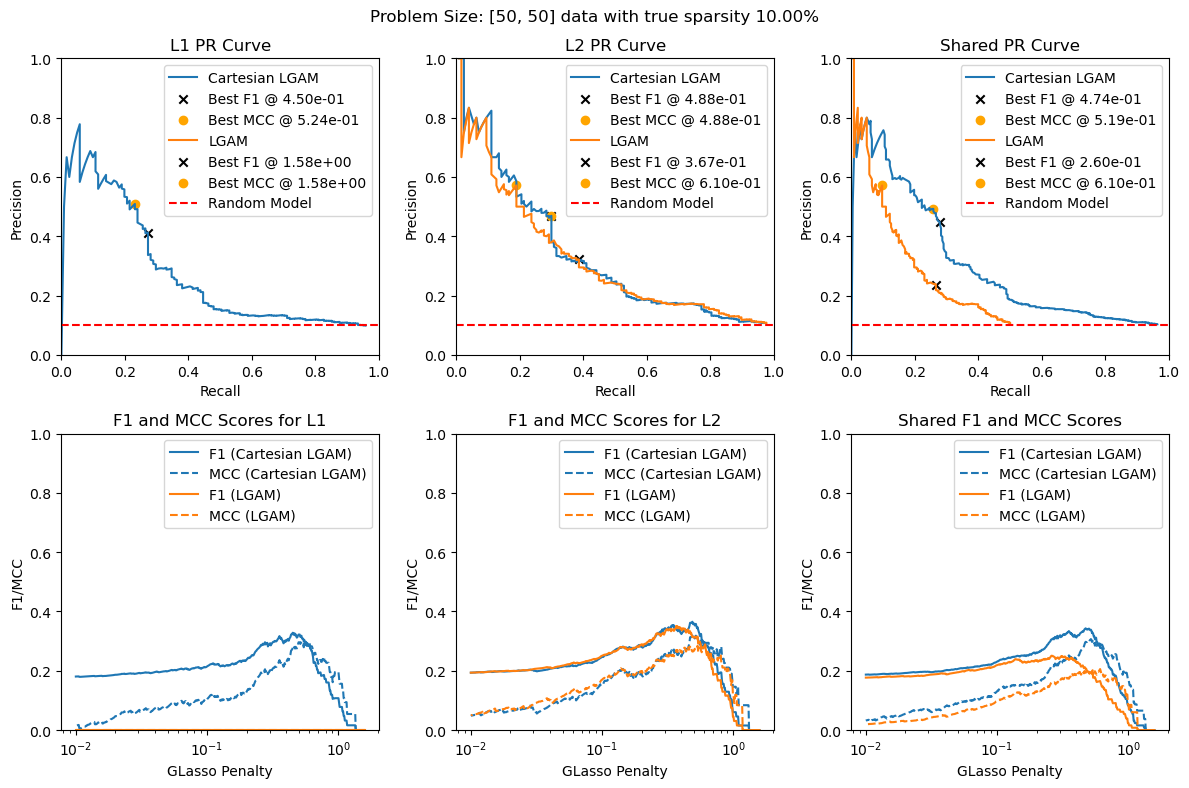

In [36]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity
)
pass

In [89]:
estim_edges = [L[1][np.tril_indices_from(L[1])] for L in L_estim_patterns]
baseline_edges = [L[1][np.tril_indices_from(L[1])] for L in L_lgam_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1])]

precs_clgam = [precision_score(true_edges, e) for e in estim_edges]
precs_lgam = [precision_score(true_edges, e) for e in baseline_edges]
recs_clgam = [recall_score(true_edges, e) for e in estim_edges]
recs_lgam = [recall_score(true_edges, e) for e in baseline_edges]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]

sort_idxs = np.argsort(recs_clgam)
auc_clgam = auc(np.array(recs_clgam)[sort_idxs], np.array(precs_clgam)[sort_idxs])
auc_lgam = auc(recs_lgam, precs_lgam)

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


    CLGAM:
        Max MCC: 0.32138457590892583
        AUCPR: 0.3279570657859805
    LGAM:
        Max MCC: 0.29077529419295
        AUCPR: 0.31499226345655007
    


In [43]:
with open("results/synthetic_normal", "wb") as fp:
    pickle.dump({
        'CLGAM': L_estim_patterns,
        'LGAM': L_lgam_estim_patterns,
        'True': L_patterns
    }, fp)

In [13]:
np.random.seed(0)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True, source_distribution=np.random.gumbel)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.2, -2, 500) # (50, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True)
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0}, dont_warm_start=True)

/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])


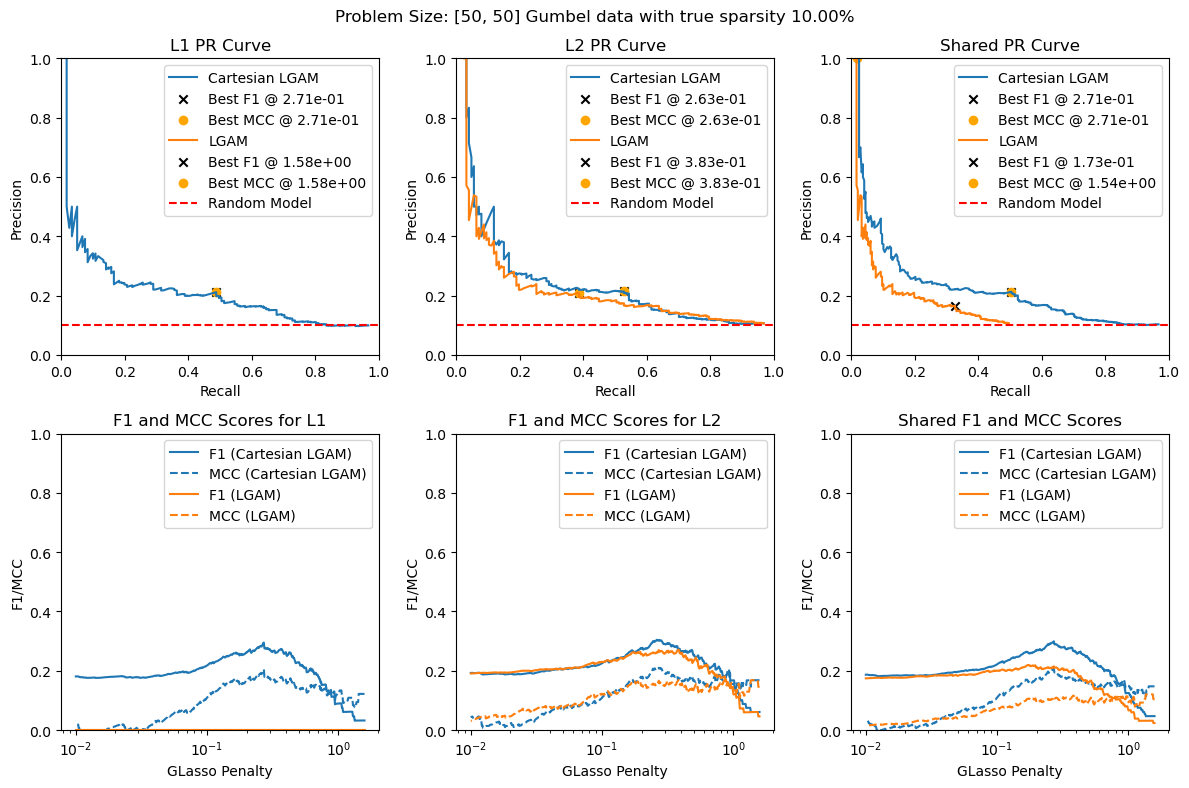

In [14]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity,
    source_distr="Gumbel"
)
pass

In [87]:
estim_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_estim_patterns]
baseline_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_lgam_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1], k=-1)]

precs_clgam = [precision_score(true_edges, e) for e in estim_edges]
precs_lgam = [precision_score(true_edges, e) for e in baseline_edges]
recs_clgam = [recall_score(true_edges, e) for e in estim_edges]
recs_lgam = [recall_score(true_edges, e) for e in baseline_edges]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]
auc_clgam = auc(recs_clgam, precs_clgam)
auc_lgam = auc(recs_lgam, precs_lgam)

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)


    CLGAM:
        Max MCC: 0.21213585914347313
        AUCPR: 0.2075130512960575
    LGAM:
        Max MCC: 0.16853696250647365
        AUCPR: 0.1952620154258392
    


In [34]:
with open("results/synthetic_gumbel", "wb") as fp:
    pickle.dump({
        'CLGAM': L_estim_patterns,
        'LGAM': L_lgam_estim_patterns,
        'True': L_patterns
    }, fp)

In [105]:
np.random.seed(0)
dims = (40, 40, 40)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.5, -2, 100) # (50, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True)
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0, 1}, dont_warm_start=True)

/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])


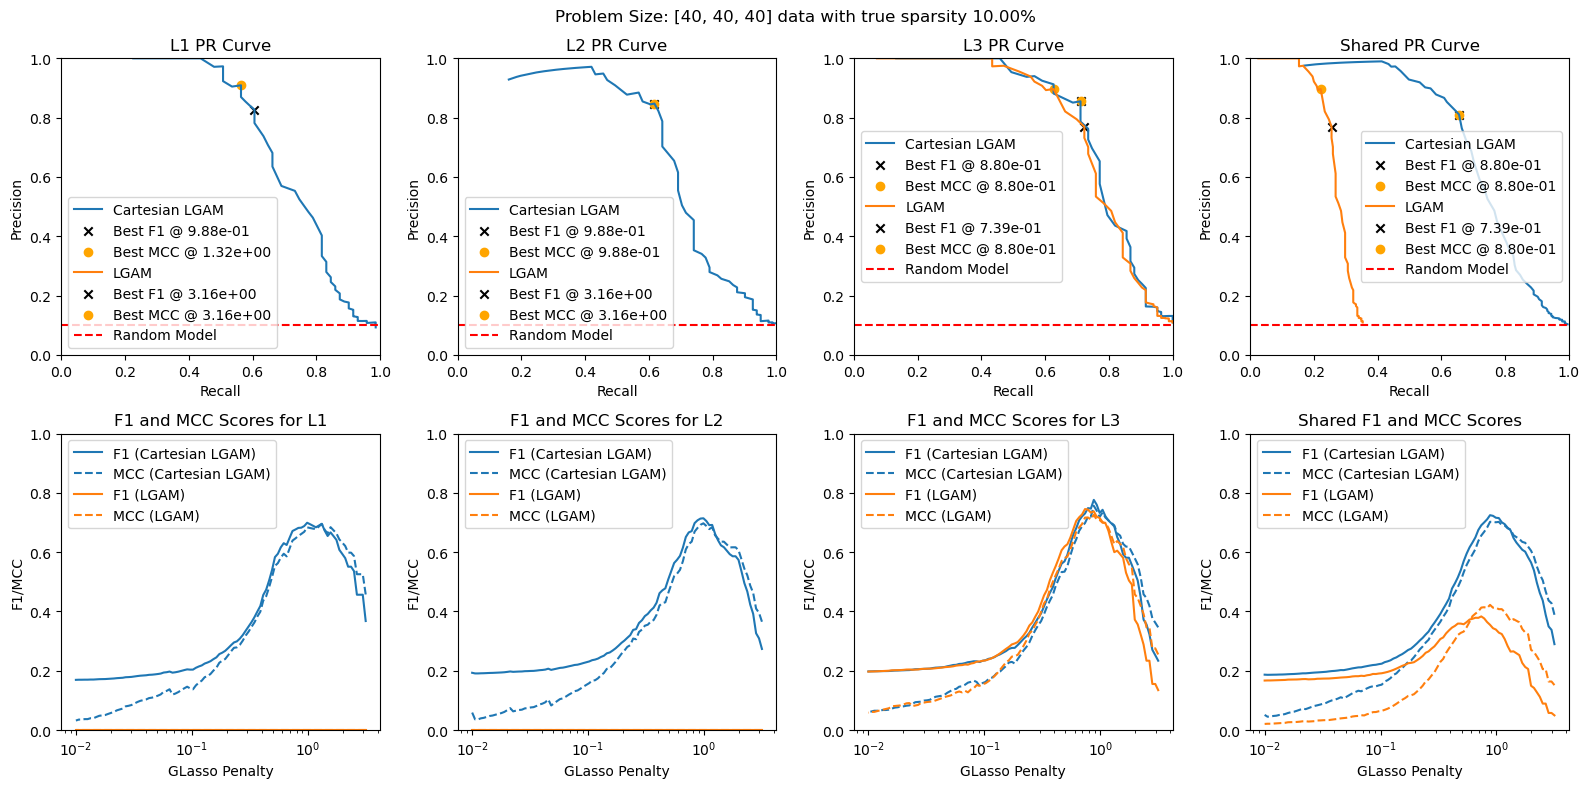

In [106]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity
)
pass

In [ ]:
estim_edges = [L[2][np.tril_indices_from(L[2], k=-1)] for L in L_estim_patterns]
baseline_edges = [L[2][np.tril_indices_from(L[2], k=-1)] for L in L_lgam_estim_patterns]
true_edges = L_patterns[2][np.tril_indices_from(L_patterns[2], k=-1)]

# They didn't quite reach the "fully regularized" or "fully unregularized" stage for this experiment
precs_clgam = [1] + [precision_score(true_edges, e) for e in estim_edges] + [0]
precs_lgam = [1] + [precision_score(true_edges, e) for e in baseline_edges] + [0]
recs_clgam = [0] + [recall_score(true_edges, e) for e in estim_edges] + [1]
recs_lgam = [0] + [recall_score(true_edges, e) for e in baseline_edges] + [1]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]

sort_idxs = np.argsort(recs_clgam)
auc_clgam = auc(np.array(recs_clgam)[sort_idxs], np.array(precs_clgam)[sort_idxs])
sort_idxs = np.argsort(recs_lgam)
auc_lgam = auc(np.array(recs_lgam)[sort_idxs], np.array(precs_lgam)[sort_idxs])

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)


    CLGAM:
        Max MCC: 0.7563360878807358
        AUCPR: 0.8012970491668373
    LGAM:
        Max MCC: 0.7262554763582708
        AUCPR: 0.7906589297223332
    


In [123]:
with open("results/synthetic_tensor", "wb") as fp:
    pickle.dump({
        'CLGAM': L_estim_patterns,
        'LGAM': L_lgam_estim_patterns,
        'True': L_patterns
    }, fp)

In [90]:
np.random.seed(0)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
Ls[1] = np.diag(np.ones(dims[1])) + np.diag(np.ones(dims[1]-1), k=-1)
L_patterns[1] = Ls[1] != 0
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.2, -2, 200) # (50, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True)
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0}, dont_warm_start=True)

/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])


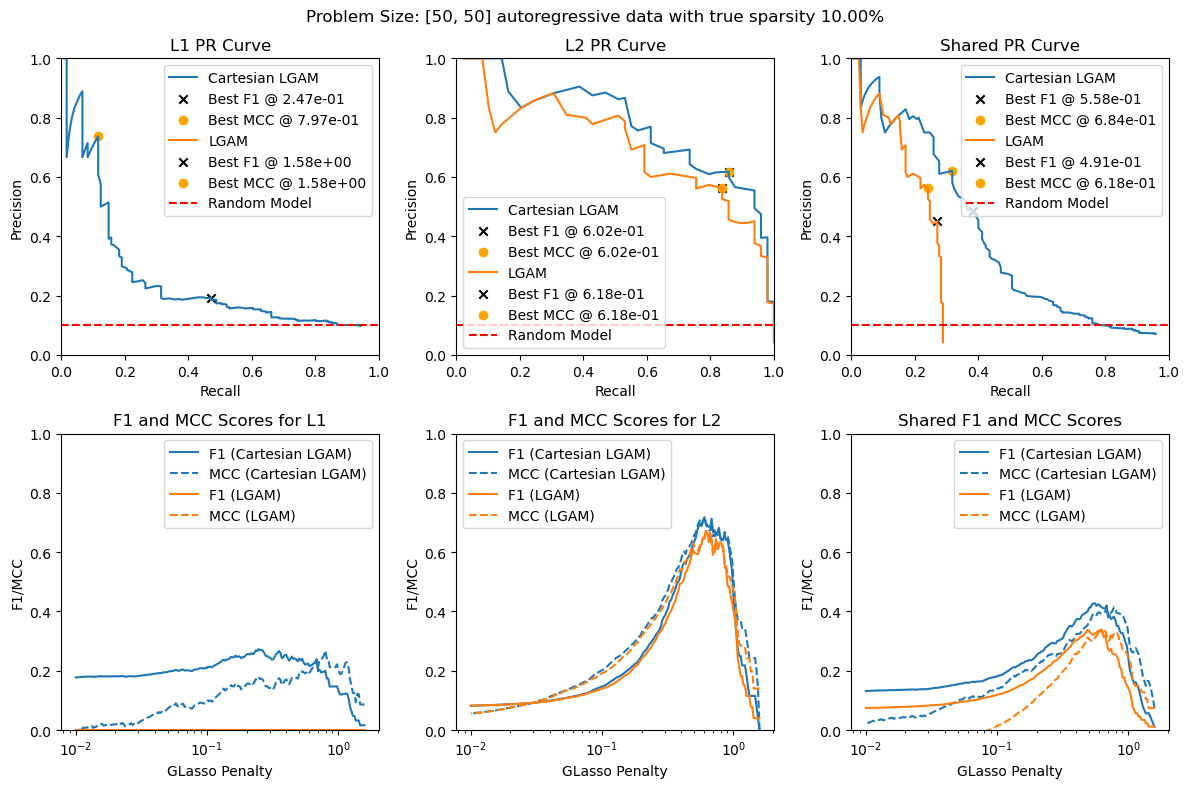

In [91]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity,
    source_distr="autoregressive"
)
pass

In [94]:
estim_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_estim_patterns]
baseline_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_lgam_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1], k=-1)]

precs_clgam = [precision_score(true_edges, e) for e in estim_edges]
precs_lgam = [precision_score(true_edges, e) for e in baseline_edges]
recs_clgam = [recall_score(true_edges, e) for e in estim_edges]
recs_lgam = [recall_score(true_edges, e) for e in baseline_edges]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]

sort_idxs = np.argsort(recs_clgam)
auc_clgam = auc(np.array(recs_clgam)[sort_idxs], np.array(precs_clgam)[sort_idxs])
sort_idxs = np.argsort(recs_lgam)
auc_lgam = auc(np.array(recs_lgam)[sort_idxs], np.array(precs_lgam)[sort_idxs])

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



    CLGAM:
        Max MCC: 0.7146357383172075
        AUCPR: 0.7618597982272866
    LGAM:
        Max MCC: 0.6701062335794902
        AUCPR: 0.6799678861054714
    


In [95]:
with open("results/synthetic_autoregressive", "wb") as fp:
    pickle.dump({
        'CLGAM': L_estim_patterns,
        'LGAM': L_lgam_estim_patterns,
        'True': L_patterns
    }, fp)

In [97]:
np.random.seed(0)
dims = (100, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.2, -2, 200) # (50, 50)
print("Starting CLGAM")
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True, max_iter=1000)
print("Starting LGAM on 50-axis")
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0}, dont_warm_start=True, max_iter=1000)
print("Starting LGAM on 200-axis")
Lss_lgam2, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={1}, dont_warm_start=True, max_iter=1000)

Starting CLGAM


/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


Starting LGAM on 50-axis
Starting LGAM on 200-axis


/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:80: RuntimeWarning: invalid value encountered in divide
  shared_precs = shared_TPs / (shared_TPs + shared_FPs)
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:97: RuntimeWarning: invalid value encountered in divide
  (shared_TPs * shared_TNs - shared_FPs * shared_FNs)


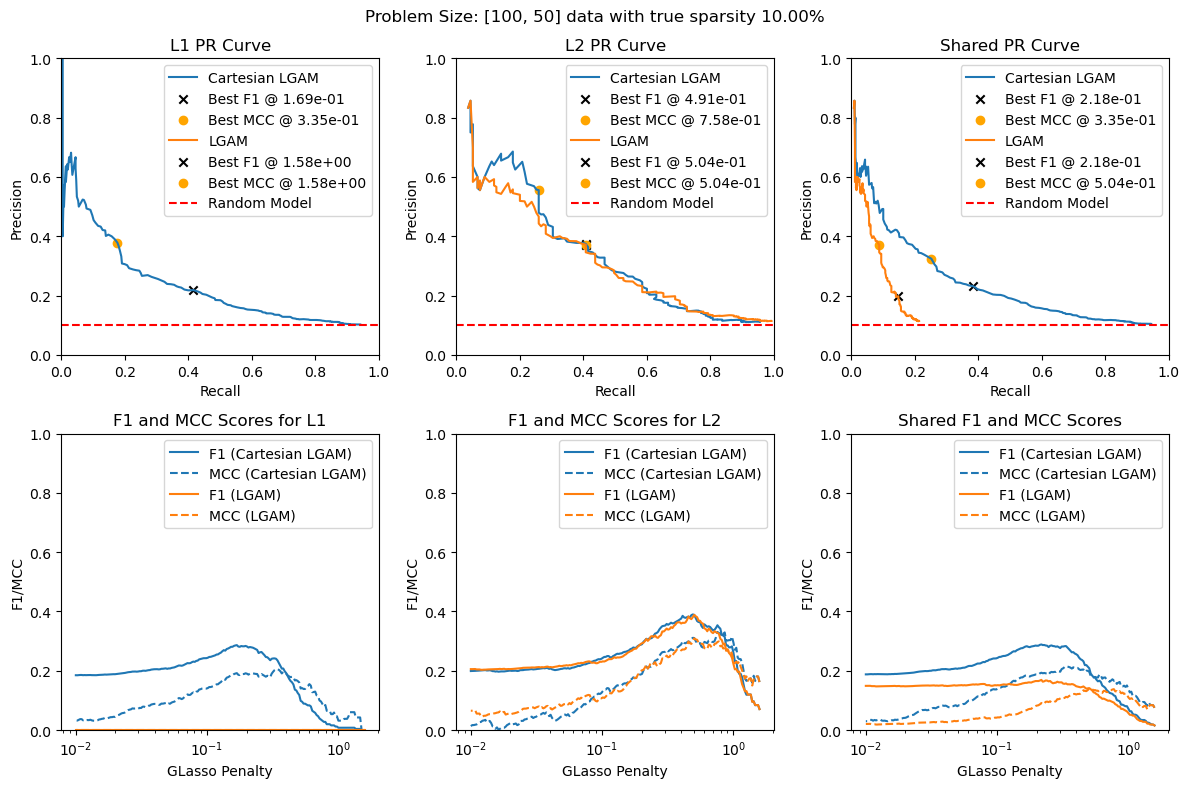

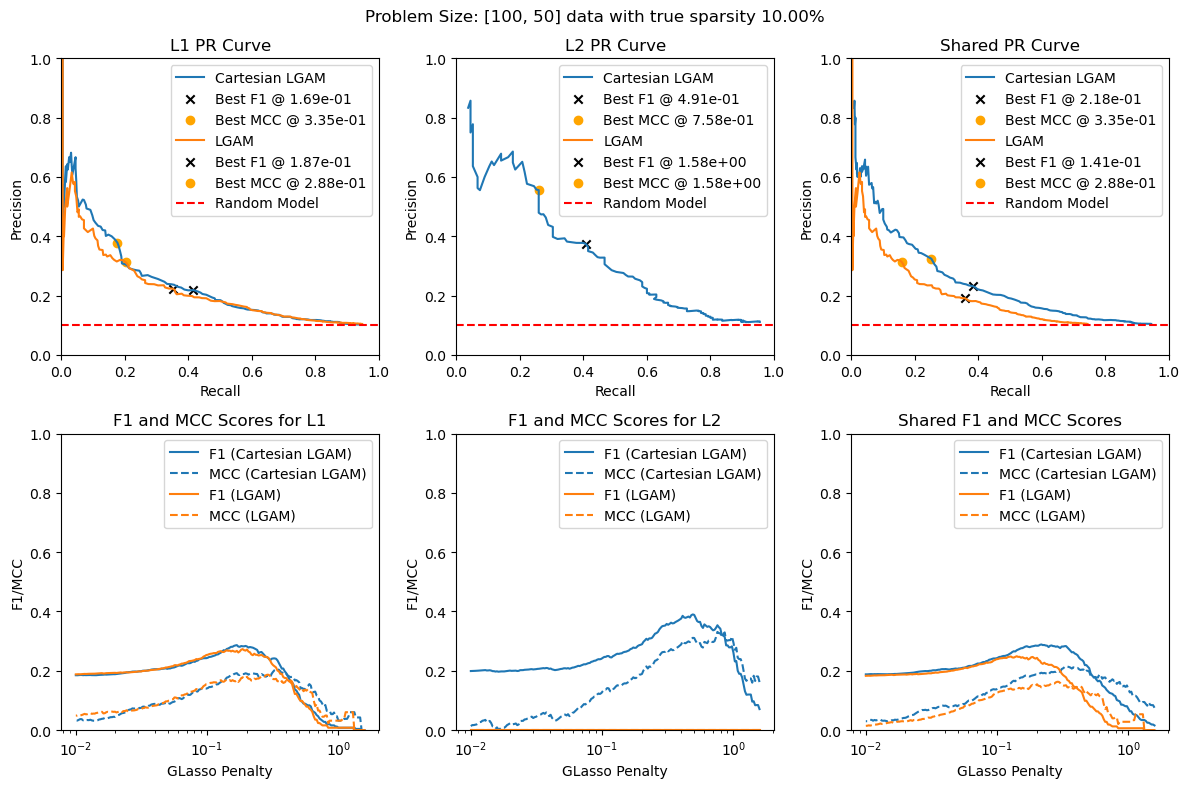

In [98]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)
L_lgam2_estim_patterns = patternify_Ls(Lss_lgam2)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity,
)
one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam2,
    glassoregs=glassoregs,
    sparsity=sparsity,
)
pass

In [102]:
estim_edges = [L[1][np.tril_indices_from(L[1])] for L in L_estim_patterns]
baseline_edges = [L[1][np.tril_indices_from(L[1])] for L in L_lgam_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1])]

precs_clgam = [precision_score(true_edges, e) for e in estim_edges]
precs_lgam = [precision_score(true_edges, e) for e in baseline_edges]
recs_clgam = [recall_score(true_edges, e) for e in estim_edges]
recs_lgam = [recall_score(true_edges, e) for e in baseline_edges]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]

sort_idxs = np.argsort(recs_clgam)
auc_clgam = auc(np.array(recs_clgam)[sort_idxs], np.array(precs_clgam)[sort_idxs])
sort_idxs = np.argsort(recs_lgam)
auc_lgam = auc(np.array(recs_lgam)[sort_idxs], np.array(precs_lgam)[sort_idxs])

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)


    CLGAM:
        Max MCC: 0.33320142269922765
        AUCPR: 0.3077145772184889
    LGAM:
        Max MCC: 0.3129792244221204
        AUCPR: 0.2970590581897629
    


In [103]:
estim_edges = [L[0][np.tril_indices_from(L[0])] for L in L_estim_patterns]
baseline_edges = [L[0][np.tril_indices_from(L[0])] for L in L_lgam2_estim_patterns]
true_edges = L_patterns[0][np.tril_indices_from(L_patterns[0])]

precs_clgam = [precision_score(true_edges, e) for e in estim_edges]
precs_lgam = [precision_score(true_edges, e) for e in baseline_edges]
recs_clgam = [recall_score(true_edges, e) for e in estim_edges]
recs_lgam = [recall_score(true_edges, e) for e in baseline_edges]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]

sort_idxs = np.argsort(recs_clgam)
auc_clgam = auc(np.array(recs_clgam)[sort_idxs], np.array(precs_clgam)[sort_idxs])
sort_idxs = np.argsort(recs_lgam)
auc_lgam = auc(np.array(recs_lgam)[sort_idxs], np.array(precs_lgam)[sort_idxs])

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


    CLGAM:
        Max MCC: 0.2065446252126772
        AUCPR: 0.22580838922892413
    LGAM:
        Max MCC: 0.18830472347654553
        AUCPR: 0.20896713587609167
    


In [104]:
with open("results/synthetic_lopsided", "wb") as fp:
    pickle.dump({
        'CLGAM': L_estim_patterns,
        'LGAM[1]': L_lgam_estim_patterns,
        'LGAM[0]': L_lgam2_estim_patterns,
        'True': L_patterns
    }, fp)

# Below are tests I've not re-run

In [ ]:
1/0

In [ ]:
np.random.seed(0)
dims = (100, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.5, -2, 50) # (100, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs)
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0})

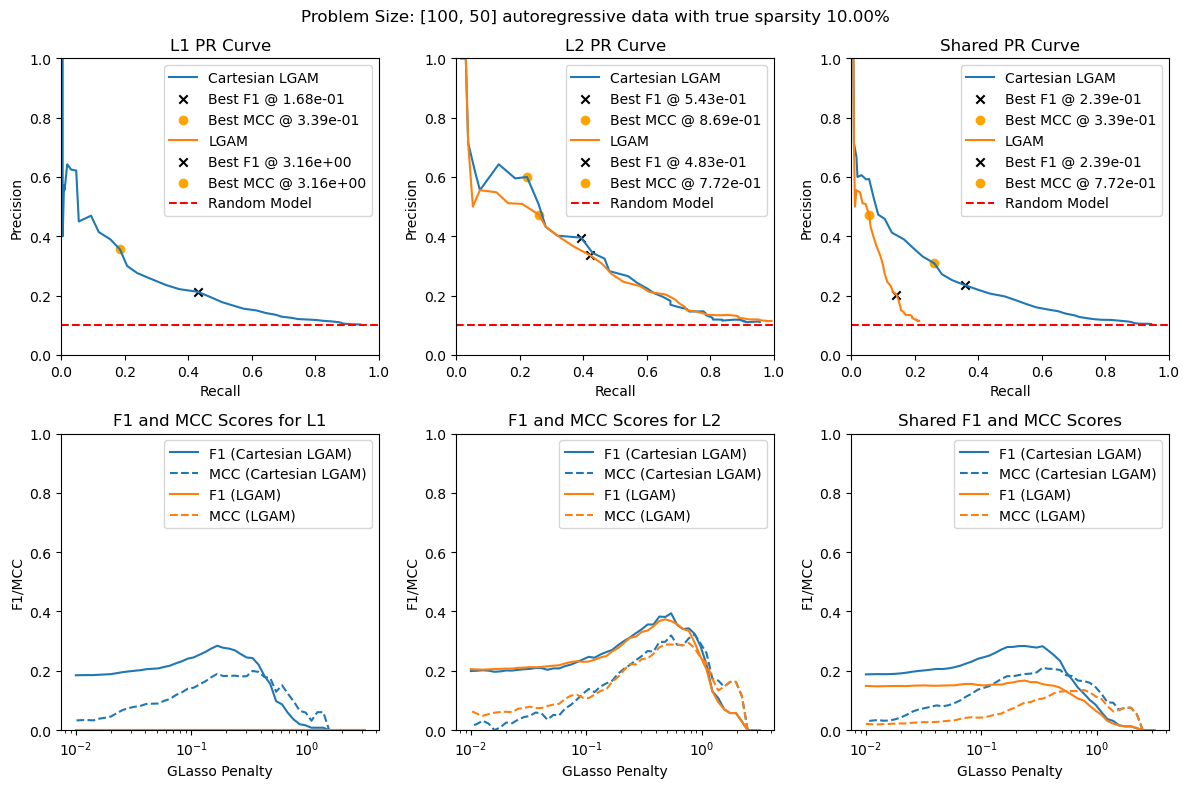

In [ ]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity
)
pass

In [32]:
np.random.seed(0)
dims = (50, 100)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity, sample_axes={0})
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.5, -2, 50) # (100, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs)
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0})

/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:80: RuntimeWarning: invalid value encountered in divide
  shared_precs = shared_TPs / (shared_TPs + shared_FPs)
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:81: RuntimeWarning: invalid value encountered in divide
  recs = [TPs[i] / (TPs[i] + FNs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:97: RuntimeWarning: invalid value encountered in divide
  (shared_TPs * shared_TNs - shared_FPs * shared_FNs)


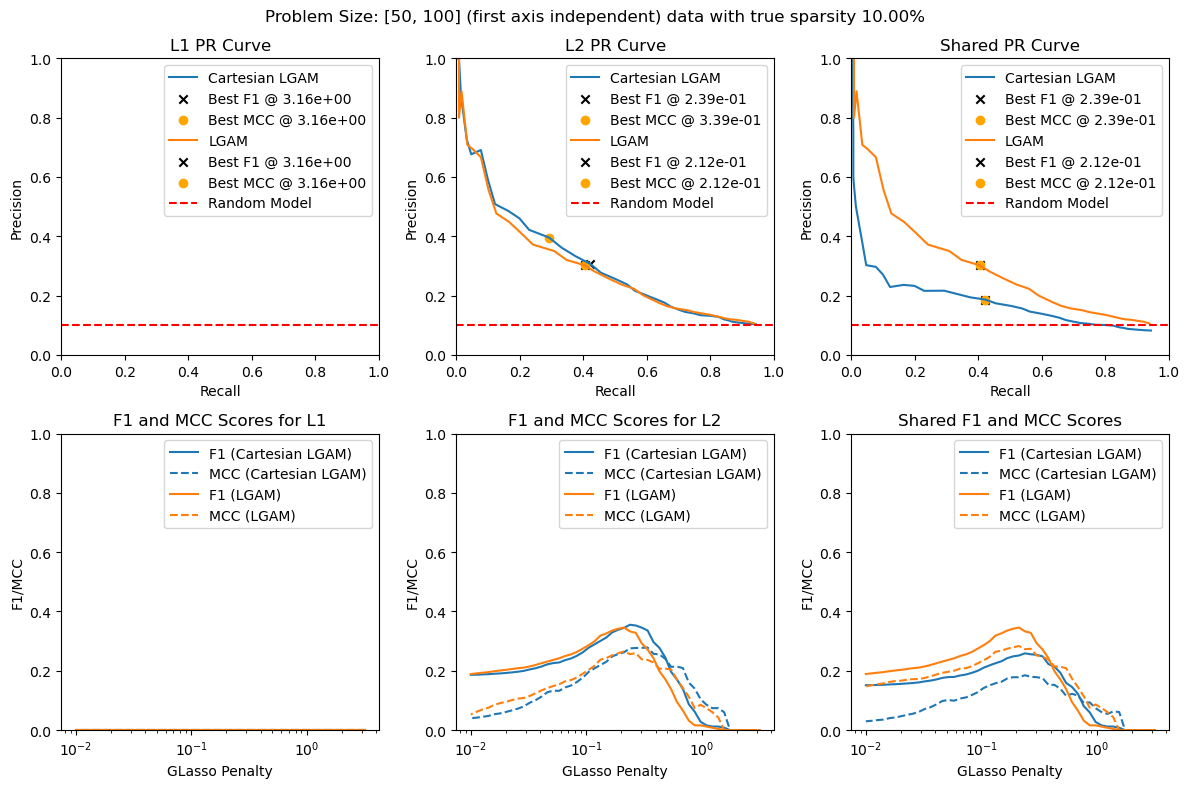

In [33]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity,
    source_distr="(first axis independent)"
)
pass

In [36]:
np.random.seed(0)
dims = (100, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity, sample_axes={0})
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.5, -2, 50) # (100, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs)
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0})

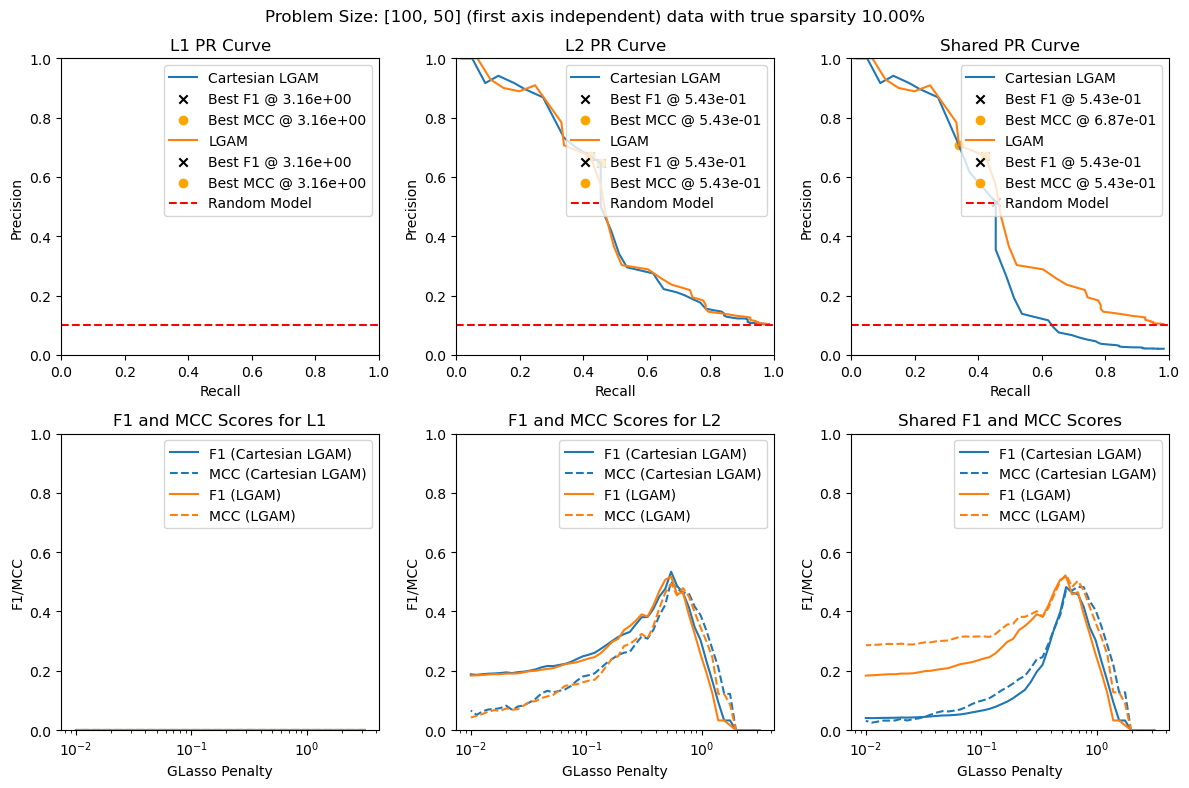

In [37]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity,
    source_distr="(first axis independent)"
)
pass

In [38]:
np.random.seed(0)
dims = (100, 50)
sparsity = 0.8
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity, sample_axes={0})
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.5, -2, 50) # (100, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs)
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0})

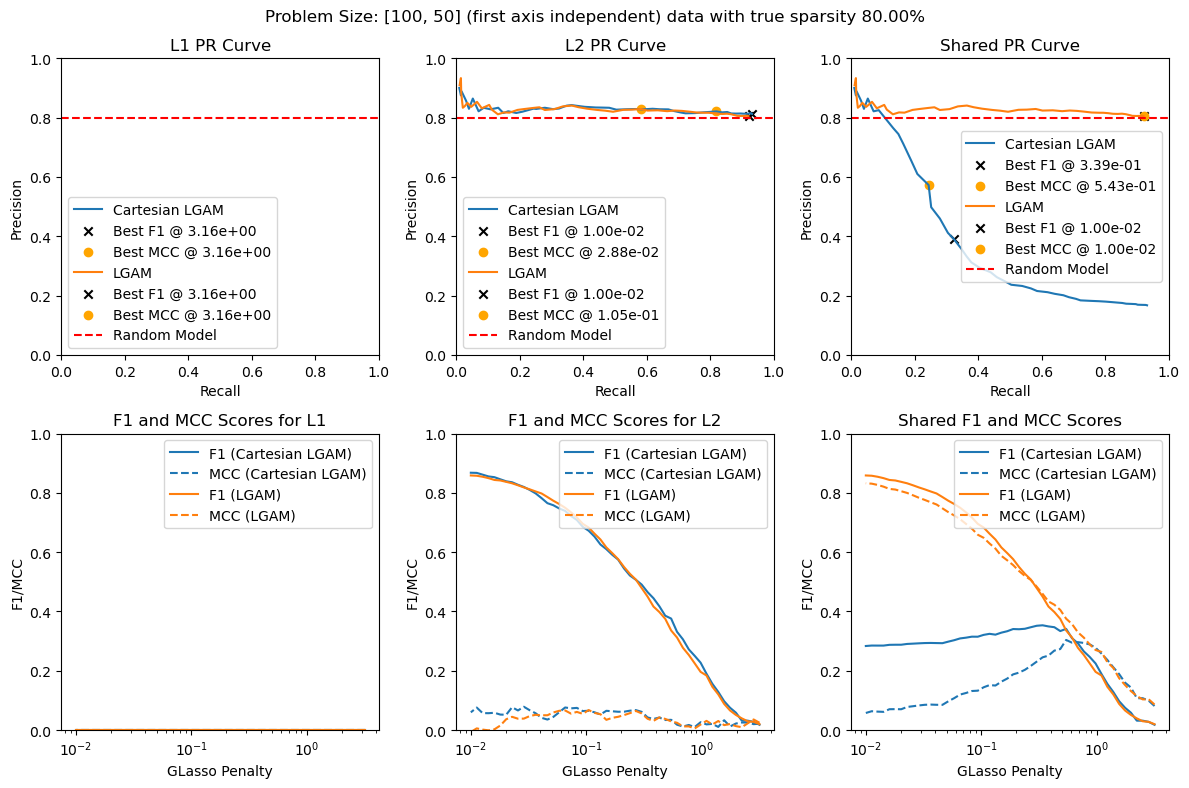

In [39]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity,
    source_distr="(first axis independent)"
)
pass

In [138]:
np.random.seed(1)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity, multiply_factor=0.9)
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.2, -2, 100) # (50, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs)
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0})

/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])


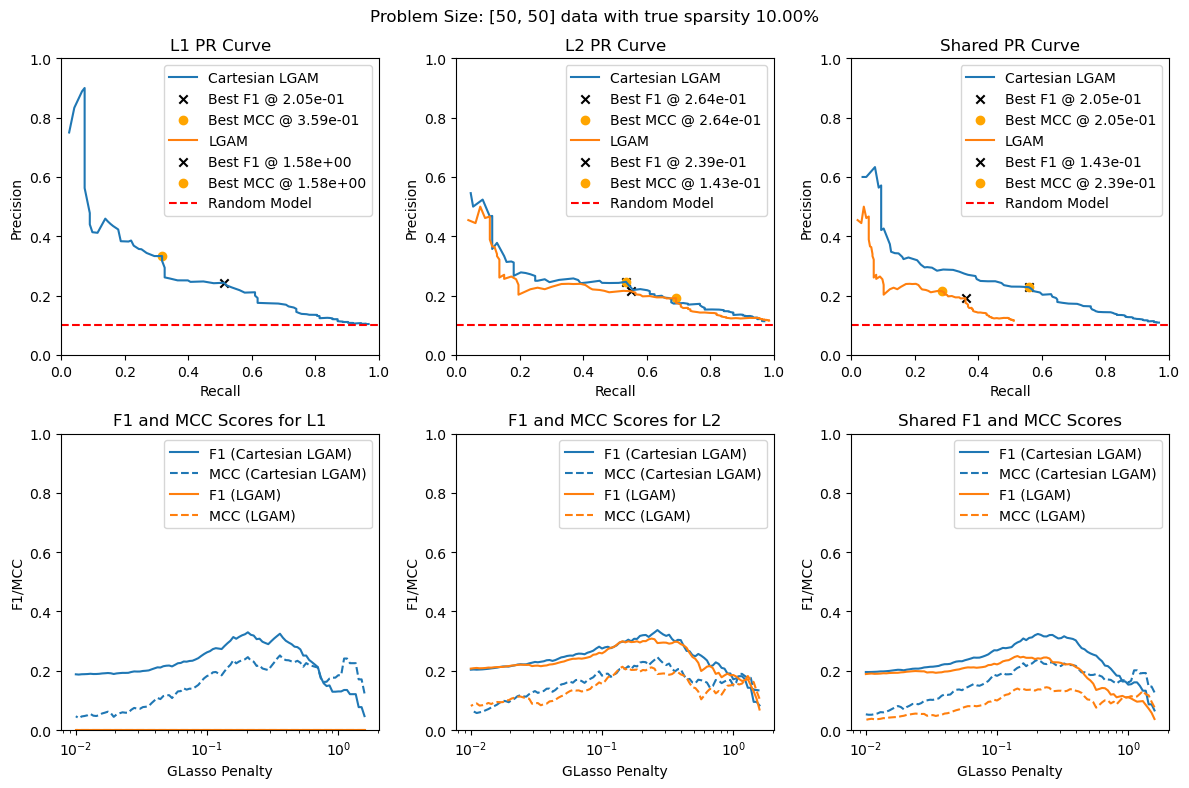

In [139]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity
)
pass

In [144]:
np.random.seed(0)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.2, -2, 500) # (50, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs)
Lss_lgam1, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0})
Lss_lgam2, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={1})
Lss_lgam = [[Ls2[0], Ls1[1]] for Ls1, Ls2 in zip(Lss_lgam1, Lss_lgam2)]

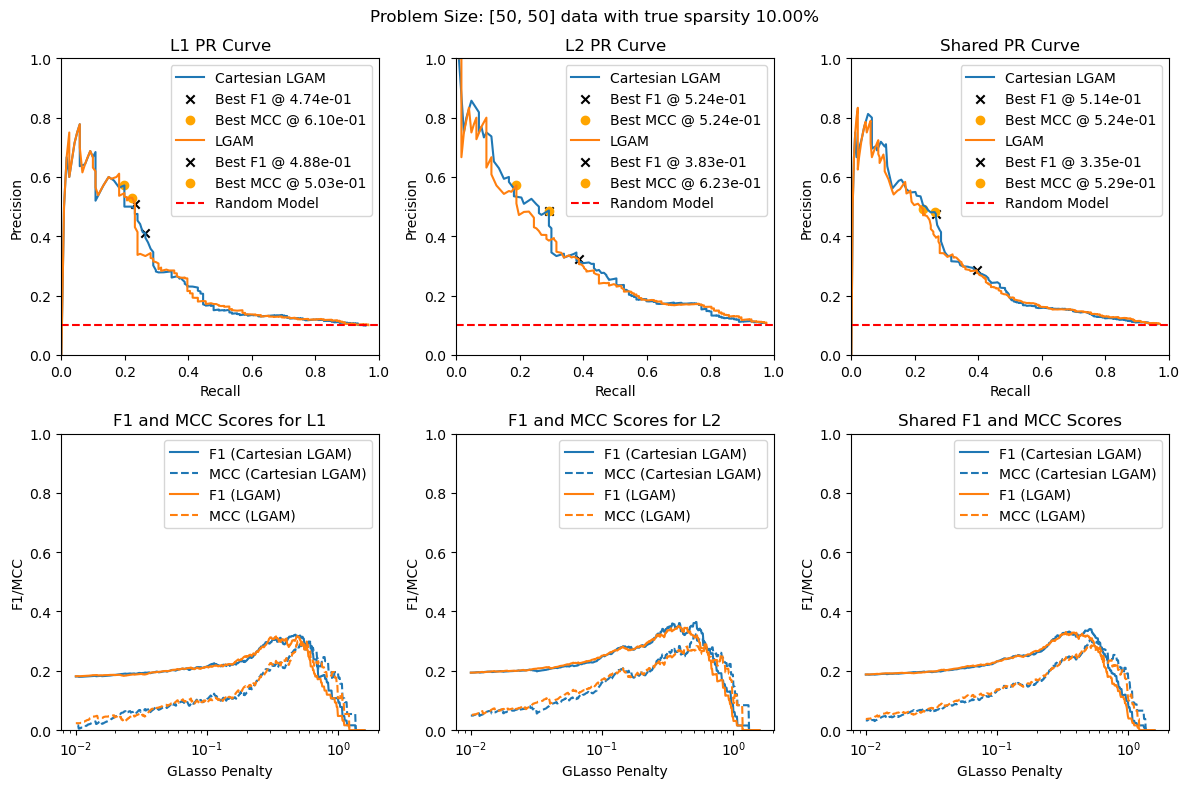

In [145]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity
)
pass

In [146]:
np.random.seed(1)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.2, -2, 500) # (50, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs)
Lss_lgam1, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0})
Lss_lgam2, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={1})
Lss_lgam = [[Ls2[0], Ls1[1]] for Ls1, Ls2 in zip(Lss_lgam1, Lss_lgam2)]

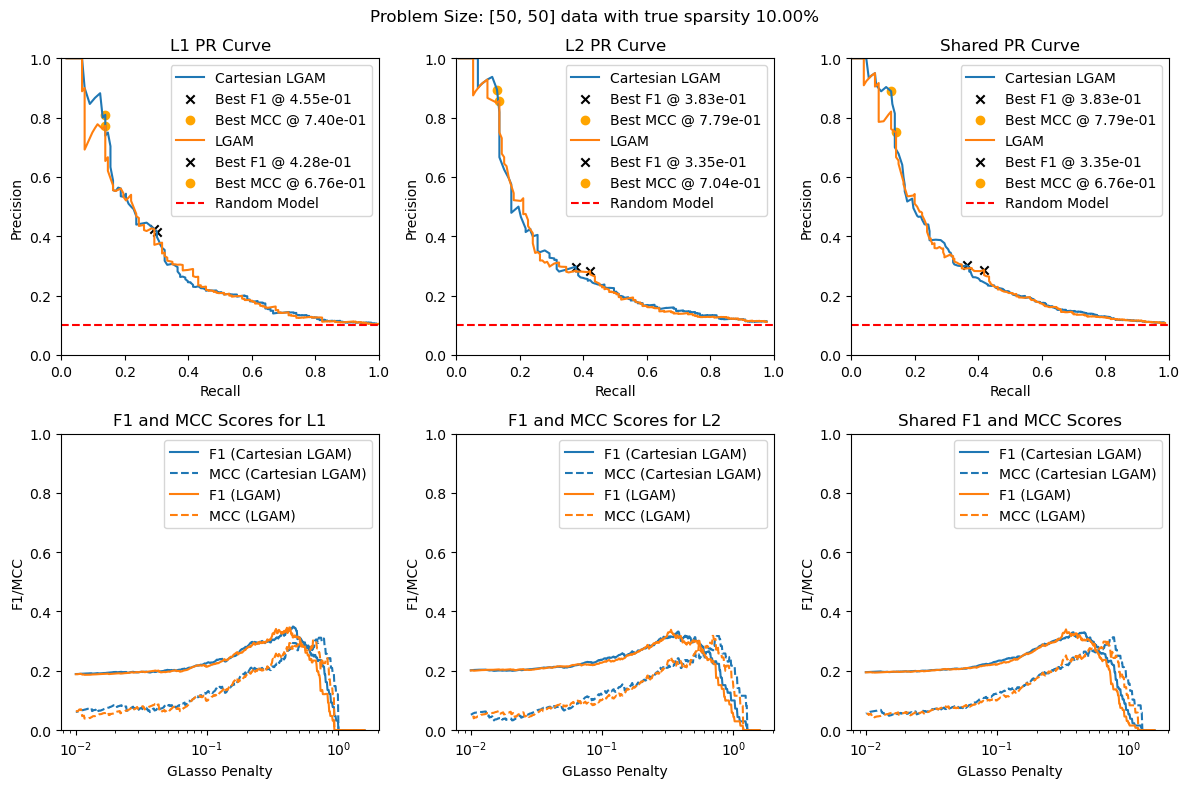

In [147]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity
)
pass